Importovanie knižníc

In [76]:
#importovanie potrebných knižníc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef

Načítanie a príprava datasetu

In [77]:
#načítanie datasetu do premennej df
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv", sep=";")
#zobrazenie informácií o datasete (atribúty a typ atribútov)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB
None


In [78]:
#na základe výpisu sme zhodnotili potrebný prevod atribútu CCAvg z kategorického na numerický kvôli zlému oddeleniu "," namiesto "."
df["CCAvg"] = df["CCAvg"].astype(str).str.replace(",", ".").astype(float)

In [79]:
#overenie či sa v datasete nenachádzajú prázdne hodnoty / nulll / NaN
print(df.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


<Axes: >

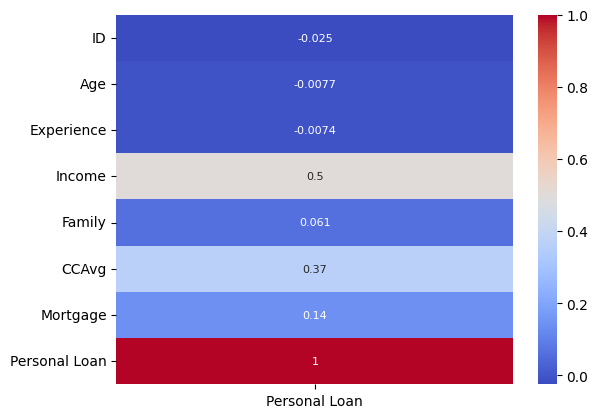

In [80]:
#heatmapa pre numerické atribúty
kore = df.drop(['ZIP Code', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'], axis=1)
kore = kore.corr()[['Personal Loan']]
sns.heatmap(kore, annot=True, cmap="coolwarm", annot_kws={"size": 8})

In [81]:
#CHI-Kvadrá pre kategorické atribúty

#CHI-Kvadrát pre test závislosti medzi atribútom Pesonal Loan a ZIP Code
contingency1 = pd.crosstab(df['Personal Loan'], df['ZIP Code'])
chi2_1, p1, dof1, expected1 = chi2_contingency(contingency1)
if(p1 < 0.05):
    vystup = "Výsledok je závislý od tohto atribútu,"
else:
    vystup = "Výsledok nie je závislý od tohto atribútu,"
print("ZIP Code :", vystup,"P = " f"{p1:.3f}", "(",p1,")")

#CHI-Kvadrát pre test závislosti medzi atribútom Pesonal Loan a Education
contingency2 = pd.crosstab(df['Personal Loan'], df['Education'])
chi2_2, p2, dof2, expected2 = chi2_contingency(contingency2)
if(p2 < 0.05):
    vystup = "Výsledok je závislý od tohto atribútu,"
else:
    vystup = "Výsledok nie je závislý od tohto atribútu,"
print("Education :", vystup,"P = " f"{p2:.3f}", "(",p2,")")

#CHI-Kvadrát pre test závislosti medzi atribútom Pesonal Loan a Securities Account
contingency3 = pd.crosstab(df['Personal Loan'], df['Securities Account'])
chi2_3, p3, dof3, expected3 = chi2_contingency(contingency3)
if(p3 < 0.05):
    vystup = "Výsledok je závislý od tohto atribútu,"
else:
    vystup = "Výsledok nie je závislý od tohto atribútu,"
print("Security account :", vystup,"P = " f"{p3:.3f}", "(",p3,")")

#CHI-Kvadrát pre test závislosti medzi atribútom Pesonal Loan a CD Account
contingency4 = pd.crosstab(df['Personal Loan'], df['CD Account'])
chi2_4, p4, dof4, expected4 = chi2_contingency(contingency4)
if(p4 < 0.05):
    vystup = "Výsledok je závislý od tohto atribútu,"
else:
    vystup = "Výsledok nie je závislý od tohto atribútu,"
print("CD Account :", vystup,"P = " f"{p4:.3f}", "(",p4,")")

#CHI-Kvadrát pre test závislosti medzi atribútom Pesonal Loan a Online
contingency5 = pd.crosstab(df['Personal Loan'], df['Online'])
chi2_5, p5, dof5, expected5 = chi2_contingency(contingency5)
if(p5 < 0.05):
    vystup = "Výsledok je závislý od tohto atribútu,"
else:
    vystup = "Výsledok nie je závislý od tohto atribútu,"
print("Online :", vystup,"P = " f"{p5:.3f}", "(",p5,")")


#CHI-Kvadrát pre test závislosti medzi atribútom Pesonal Loan a CreditCard
contingency6 = pd.crosstab(df['Personal Loan'], df['CreditCard'])
chi2_6, p6, dof6, expected6 = chi2_contingency(contingency6)
if(p6 < 0.05):
    vystup = "Výsledok je závislý od tohto atribútu,"
else:
    vystup = "Výsledok nie je závislý od tohto atribútu,"
print("CreditCard :", vystup,"P = " f"{p6:.3f}", "(",p6,")")

ZIP Code : Výsledok nie je závislý od tohto atribútu, P = 0.760 ( 0.7596677658976876 )
Education : Výsledok je závislý od tohto atribútu, P = 0.000 ( 6.991473868665428e-25 )
Security account : Výsledok nie je závislý od tohto atribútu, P = 0.141 ( 0.14051497326319357 )
CD Account : Výsledok je závislý od tohto atribútu, P = 0.000 ( 7.398297503329848e-110 )
Online : Výsledok nie je závislý od tohto atribútu, P = 0.693 ( 0.6928599643141485 )
CreditCard : Výsledok nie je závislý od tohto atribútu, P = 0.884 ( 0.8843861223314505 )


Grafy

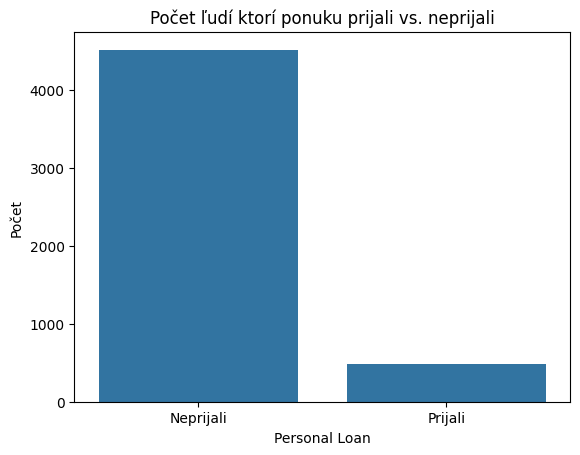

In [82]:
#Graf zobrazujúci počet ľudí ktorí ponuku úveru prijali a ktorí ju neprijali pomocou countplotu
sns.countplot(data=df, x="Personal Loan") 
plt.title("Počet ľudí ktorí ponuku prijali vs. neprijali")
plt.ylabel("Počet")
plt.xticks(ticks=[0,1], labels=["Neprijali", "Prijali"])
plt.show()

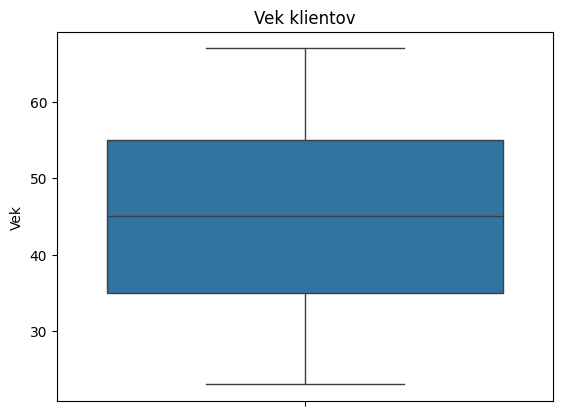

In [83]:
#Graf zobrazujúci vek klientov banky pomocou boxplotu
sns.boxplot(data=df, y="Age")
plt.title("Vek klientov")
plt.ylabel("Vek")
plt.show()

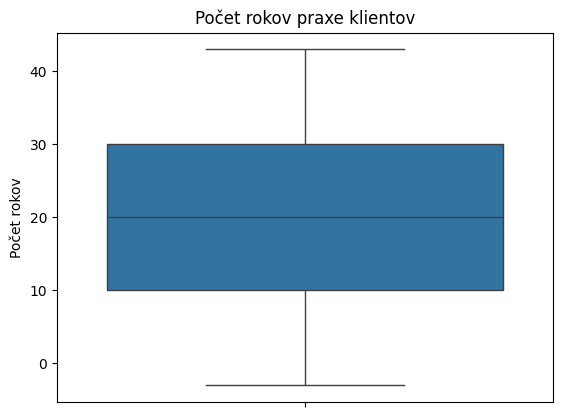

In [84]:
#Graf zobrazujúci počet rokov praxe klientov pomocou boxplotu
sns.boxplot(data=df, y="Experience")
plt.title("Počet rokov praxe klientov")
plt.ylabel("Počet rokov")
plt.show()

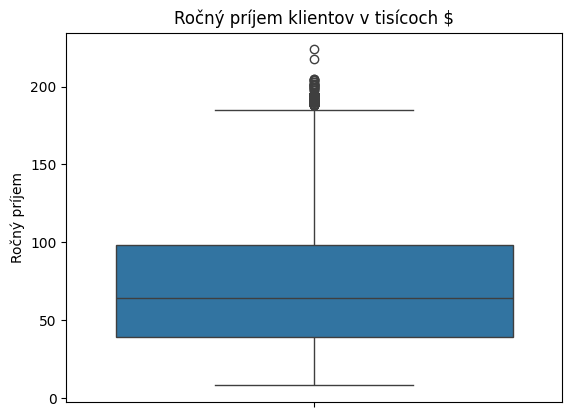

In [85]:
#Graf zobrazujúci ročný príjem klientov pomocou boxplotu
sns.boxplot(data=df, y="Income")
plt.title("Ročný príjem klientov v tisícoch $")
plt.ylabel("Ročný príjem")
plt.show()

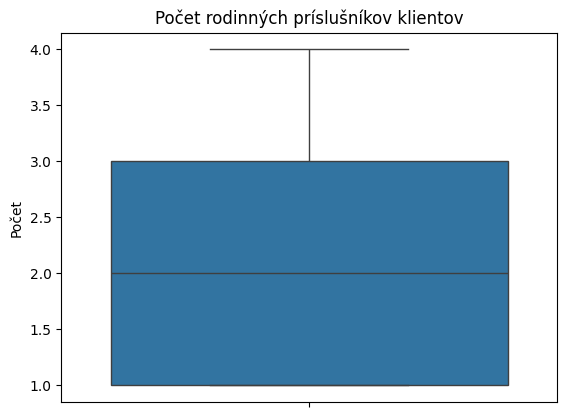

In [86]:
#Graf zobrazujúci počet rodinných príslušníkov klientov pomocou boxplotu
sns.boxplot(data=df, y="Family")
plt.title("Počet rodinných príslušníkov klientov")
plt.ylabel("Počet")
plt.show()

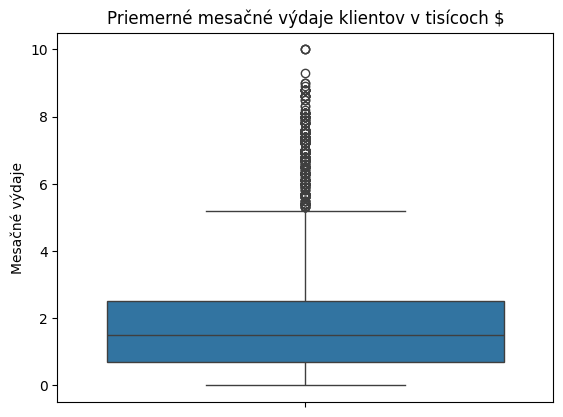

In [87]:
#Graf zobrazujúci priemerné mesačné výdaje klientov pomocou boxplotu
sns.boxplot(data=df, y="CCAvg")
plt.title("Priemerné mesačné výdaje klientov v tisícoch $")
plt.ylabel("Mesačné výdaje")
plt.show()

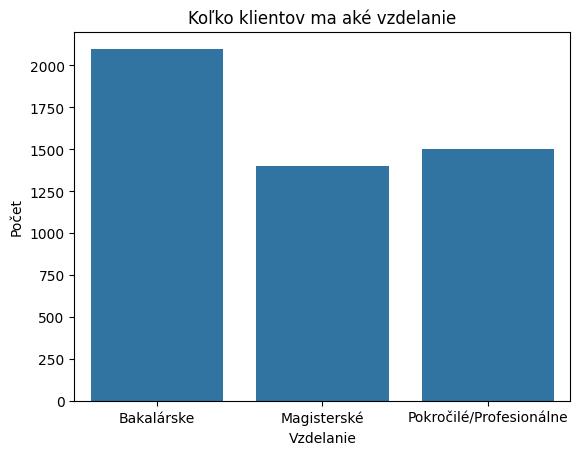

In [88]:
#Graf zobrazujúci počet klientov s daným vzdelaním pomocou countplotu
sns.countplot(data=df, x="Education")
plt.title("Koľko klientov ma aké vzdelanie")
plt.ylabel("Počet")
plt.xlabel("Vzdelanie")
plt.xticks(ticks=[0, 1, 2], labels=["Bakalárske", "Magisterské", "Pokročilé/Profesionálne"])
plt.show()

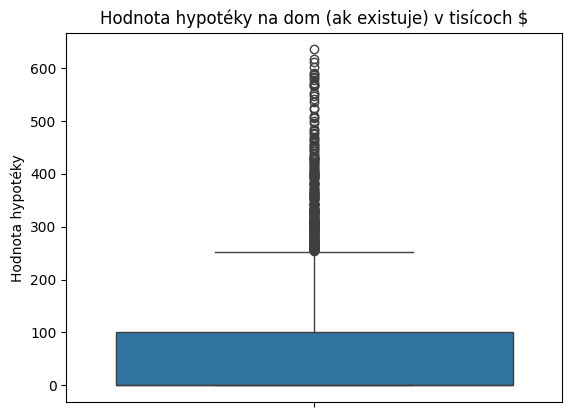

In [89]:
#Graf zobrazujúci hodnotu hypotéky na dom klientov ak už existuje pomocou boxplotu
sns.boxplot(data=df, y="Mortgage")
plt.title("Hodnota hypotéky na dom (ak existuje) v tisícoch $")
plt.ylabel("Hodnota hypotéky")
plt.show()

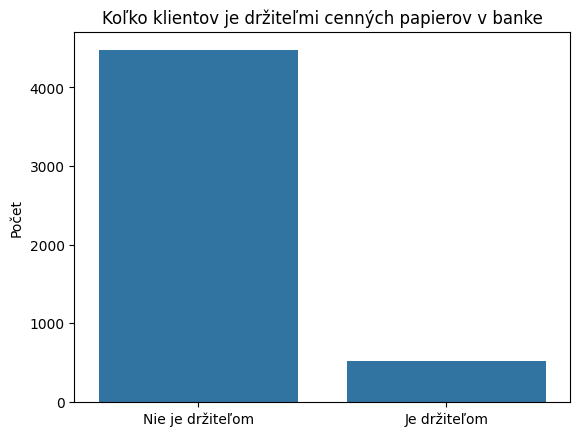

In [90]:
#Graf zobrazujúci počet klientov ktorí sú alebo nie sú držiteľmi cenných papierov v banke pomocou countplotu
sns.countplot(data=df, x="Securities Account")
plt.title("Koľko klientov je držiteľmi cenných papierov v banke")
plt.xticks(ticks=[0, 1], labels=["Nie je držiteľom", "Je držiteľom"])
plt.ylabel("Počet")
plt.xlabel("")
plt.show()

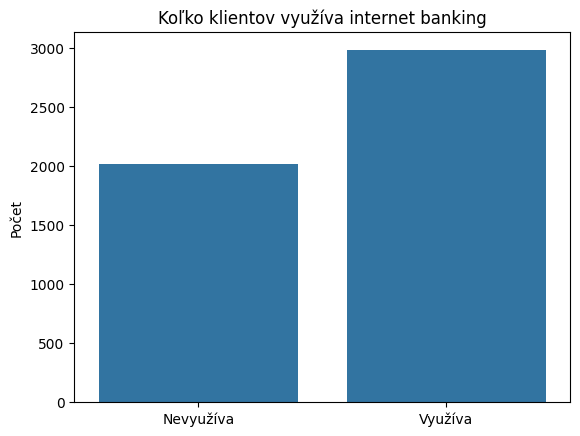

In [91]:
#Graf zobrazujúci počet klientov ktorí využívajú internet banking oproti klientom ktorí ho nevyužívajú pomocou countplotu
sns.countplot(data=df, x="Online")
plt.title("Koľko klientov využíva internet banking")
plt.xticks(ticks=[0, 1], labels=["Nevyužíva", "Využíva"])
plt.xlabel("")
plt.ylabel("Počet")
plt.show()

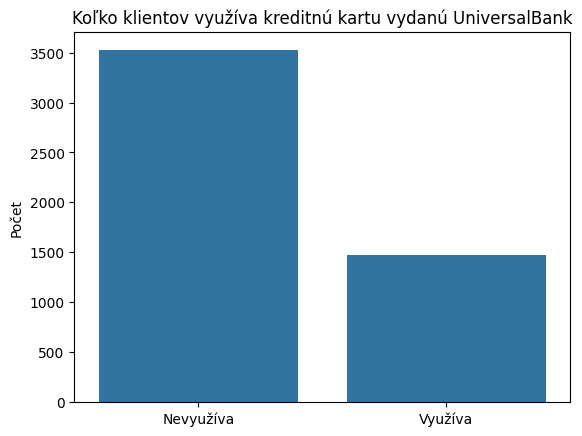

In [92]:
#Graf zobrazujúci koľko klientov využíva kreditnú kartu vydanú UniversalBank pomocou countplotu
sns.countplot(data=df, x="CreditCard")
plt.title("Koľko klientov využíva kreditnú kartu vydanú UniversalBank")
plt.xticks(ticks=[0, 1], labels=["Nevyužíva", "Využíva"])
plt.xlabel("")
plt.ylabel("Počet")
plt.show()

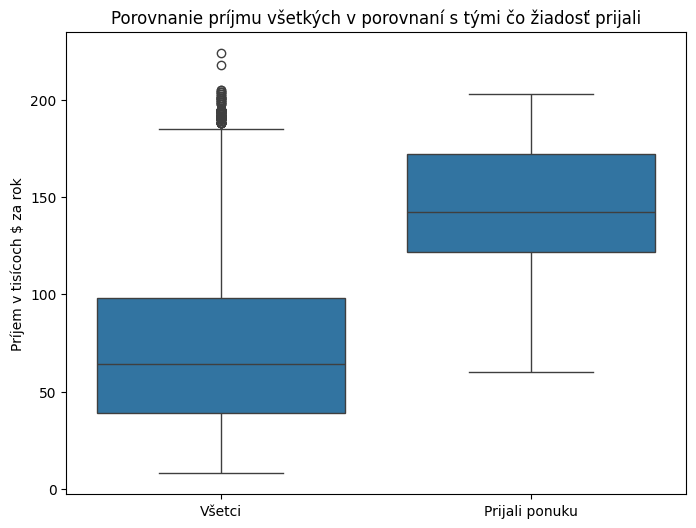

In [93]:
#Graf zobrazujúci príjem klientov ktorí ponuku úveru prijali oproti klientom ktorí ponuku neprijali pomocou boxplotu
df_income = pd.concat([
    df.assign(Group="Všetci")[["Income", "Group"]],
    df[df["Personal Loan"] == 1].assign(Group="Prijali ponuku")[["Income", "Group"]]
])
plt.figure(figsize=(8, 6))
sns.boxplot(x="Group", y="Income", data=df_income)
plt.title("Porovnanie príjmu všetkých v porovnaní s tými čo žiadosť prijali")
plt.xlabel("")
plt.ylabel("Príjem v tisícoch $ za rok")
plt.show()

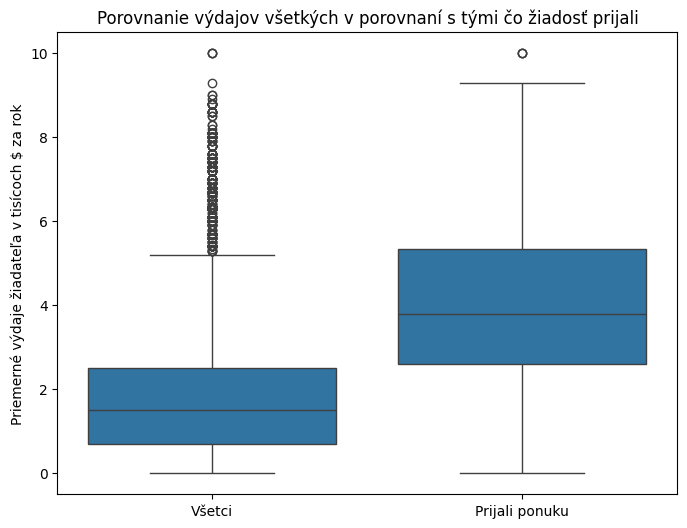

In [94]:
#Graf zobrazujúci priemerné mesačné výdaje klientov ktorí ponuku úveru prijali oproti klientom ktorí ponuku neprijali pomocou boxplotu
df_CCAvg = pd.concat([
    df.assign(Group="Všetci")[["CCAvg", "Group"]],
    df[df["Personal Loan"] == 1].assign(Group="Prijali ponuku")[["CCAvg", "Group"]]
])
plt.figure(figsize=(8, 6))
sns.boxplot(x="Group", y="CCAvg", data=df_CCAvg)
plt.title("Porovnanie výdajov všetkých v porovnaní s tými čo žiadosť prijali")
plt.xlabel("")
plt.ylabel("Priemerné výdaje žiadateľa v tisícoch $ za rok")
plt.show()

Nadvzorkovanie metódou SMOTE

In [95]:
atributy = ['Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education', 'Family']
cielovy_atribut = 'Personal Loan'
X = df[atributy]
y = df[cielovy_atribut]
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
df_os = pd.DataFrame(X_resampled, columns=atributy)
df_os[cielovy_atribut] = y_resampled
df_clean = df[atributy + [cielovy_atribut]]

Text(0.5, 1.0, 'Počet ľudí ktorí ponuku prijali vs. neprijali')

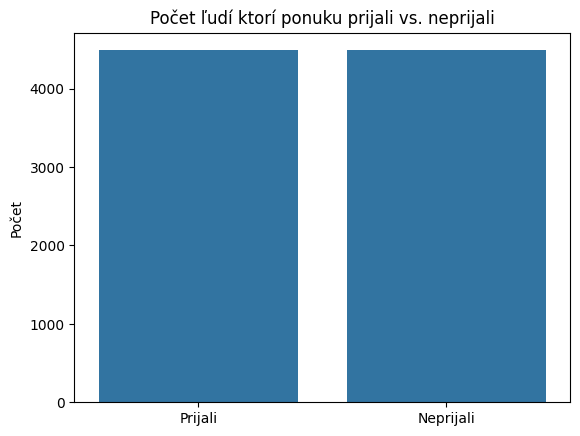

In [101]:
#Graf zobrazujúci počet klientov ktorí ponuku úveru prijali oproti klientom ktorí ponuku neprijali pomocou countplotu po aplikovaní nadvzorkovania
sns.countplot(data=df_os, x="Personal Loan")
plt.xticks(ticks=[0, 1], labels=["Prijali", "Neprijali"])
plt.xlabel("")
plt.ylabel("Počet")
plt.title("Počet ľudí ktorí ponuku prijali vs. neprijali")

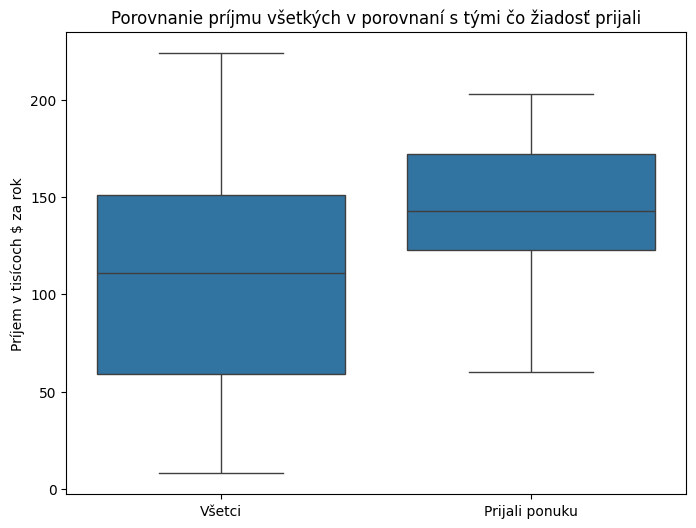

In [ ]:
#Graf zobrazujúci príjem klientov ktorí ponuku úveru prijali oproti klientom ktorí ponuku neprijali pomocou boxplotu po aplikovaní nadvzorkovania
df_income2 = pd.concat([
    df_os.assign(Group="Všetci")[["Income", "Group"]],
    df_os[df_os["Personal Loan"] == 1].assign(Group="Prijali ponuku")[["Income", "Group"]]
])
plt.figure(figsize=(8, 6))
sns.boxplot(x="Group", y="Income", data=df_income2)
plt.title("Porovnanie príjmu všetkých v porovnaní s tými čo žiadosť prijali")
plt.xlabel("")
plt.ylabel("Príjem v tisícoch $ za rok")
plt.show()

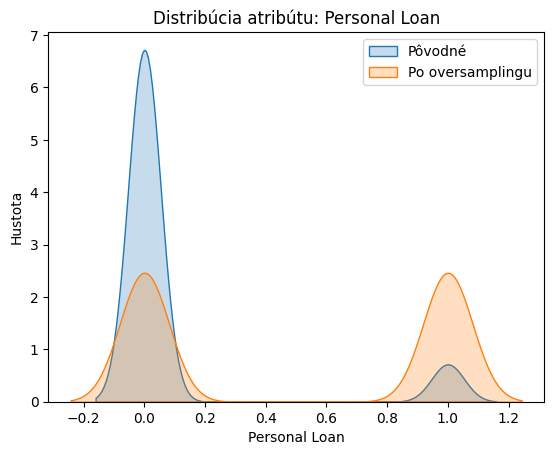

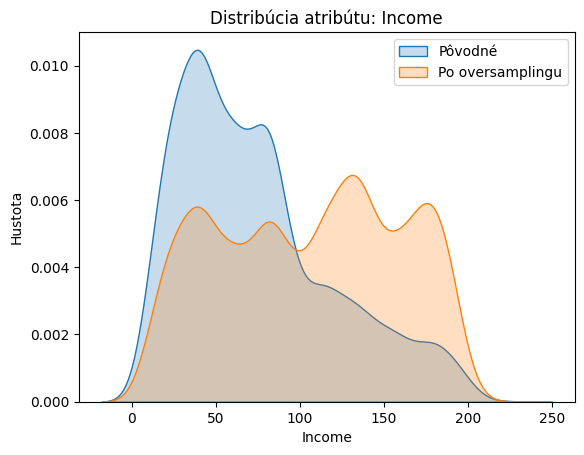

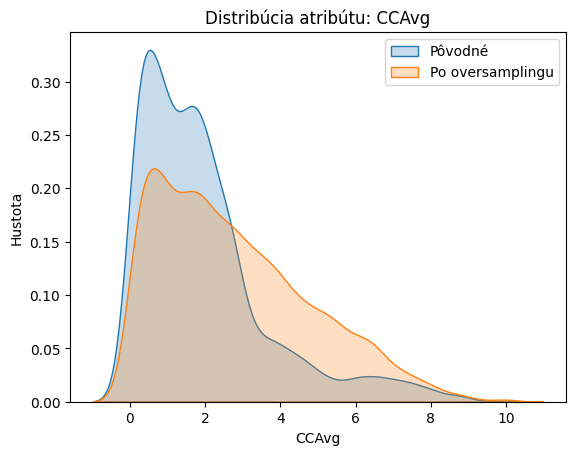

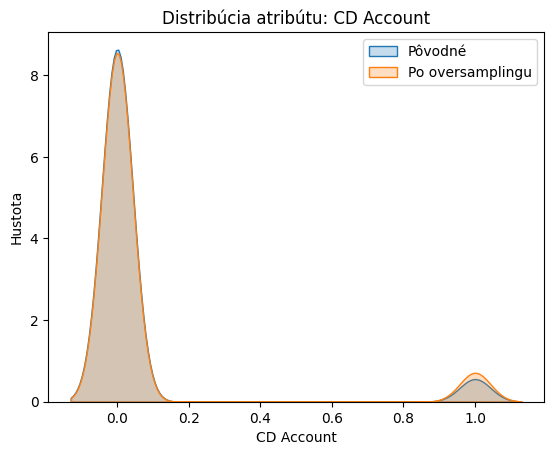

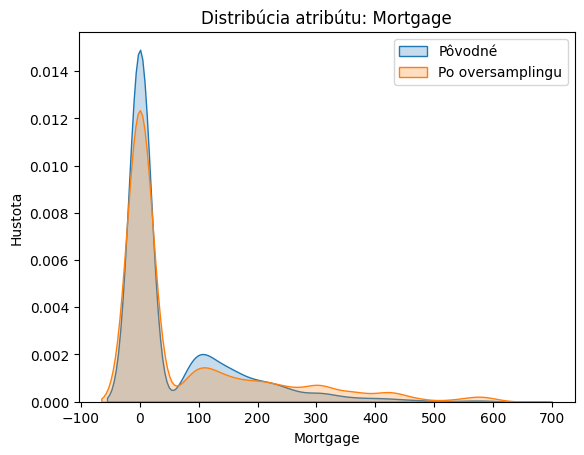

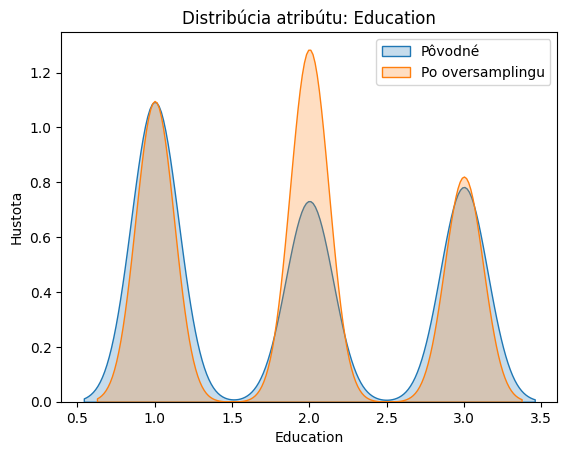

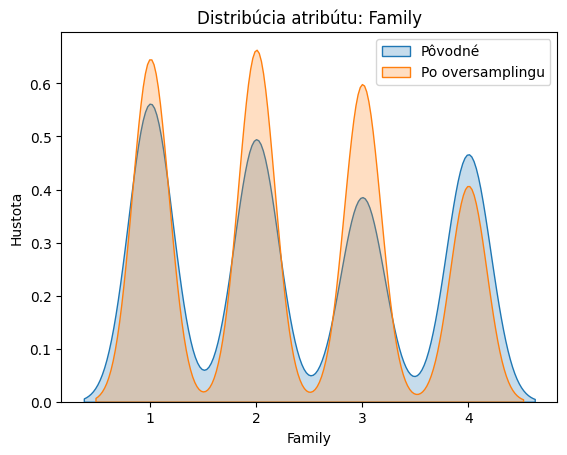

In [100]:
# Grafy zobrazujúce rozloženie hodnôt vybraných atribútov pred a po aplikovaní nadvzorkovania
relevant_columns = ['Personal Loan', 'Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education', 'Family']
for col in relevant_columns:
    sns.kdeplot(data=df, x=col, label='Pôvodné', fill=True)
    sns.kdeplot(data=df_os, x=col, label='Po oversamplingu', fill=True)
    plt.title(f'Distribúcia atribútu: {col}')
    plt.ylabel('Hustota')
    plt.legend()
    plt.show()

Škálovanie atribútov Income, CCAvg, Mortage a family použítím Min Max škálovania

In [30]:
scale = ['Income', 'CCAvg', 'Mortgage', 'Family']

df_scale = df_clean
df_os_scale = df_os

scaler = MinMaxScaler()
df_scale[scale] = scaler.fit_transform(df_scale[scale])
df_os_scale[scale] = scaler.fit_transform(df_os_scale[scale])

C:\Users\Tomáš\AppData\Local\Temp\ipykernel_33480\3402265909.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scale[scale] = scaler.fit_transform(df_scale[scale])


In [56]:
# Počet výskytov tried pred oversamplingom
print("Pred nadvzorkovaním:")
print(df_scale['Personal Loan'].value_counts())
print("Spolu:", df_scale.shape[0])

# Počet výskytov tried po oversamplingu
print("\nPo nadvzorkovaní:")
print(df_os_scale['Personal Loan'].value_counts())
print("Spolu:", df_os_scale.shape[0])

Pred nadvzorkovaním:
Personal Loan
0    4520
1     480
Name: count, dtype: int64
Spolu: 5000

Po nadvzorkovaní:
Personal Loan
0    4488
1    4488
Name: count, dtype: int64
Spolu: 8976


Rozdelenie dát na trenovaciu a testovaciu množinu v pomere 80:20

In [32]:
X = df_scale.drop(columns=['Personal Loan'])
y = df_scale['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_os = df_os_scale.drop(columns=['Personal Loan'])
y_os = df_os_scale['Personal Loan']

X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size=0.2, random_state=42, stratify=y_os)

Trénovanie modelu Náhodného lesa pred nadvzorkovaním

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.3f}")
rf_pred = rf.predict(X_test)
mcc_rf_pred = matthews_corrcoef(y_test, rf_pred)
print(f"MCC : {mcc_rf_pred:.3f}")

Accuracy: 0.990
Precision: 0.957
Recall: 0.938
F1 Score: 0.947
MCC : 0.942


Trénovanie modelu Náhodného lesa po nadvzorkovaním

In [ ]:
rf_os = RandomForestClassifier(random_state=42)
rf_os.fit(X_train_os, y_train_os)
y_pred_rf_os = rf_os.predict(X_test_os)

print(f"Accuracy: {accuracy_score(y_test_os, y_pred_rf_os):.3f}")
print(f"Precision: {precision_score(y_test_os, y_pred_rf_os):.3f}")
print(f"Recall: {recall_score(y_test_os, y_pred_rf_os):.3f}")
print(f"F1 Score: {f1_score(y_test_os, y_pred_rf_os):.3f}")
rf_po = rf_os.predict(X_test_os)
mcc_rf = matthews_corrcoef(y_test_os, rf_po)
print(f"MCC : {mcc_rf:.3f}")

Accuracy: 0.986
Precision: 0.976
Recall: 0.996
F1 Score: 0.986
MCC : 0.971


ROC krivka pre Náhodný les

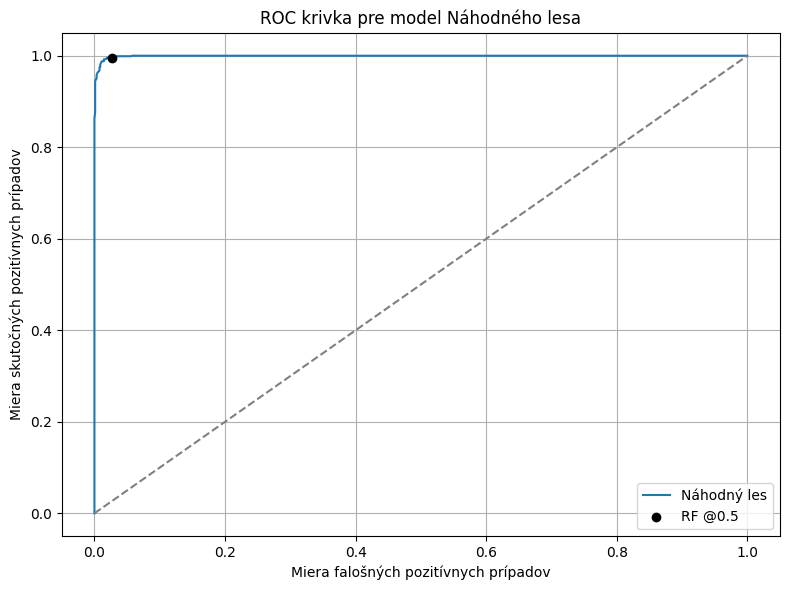

In [50]:
rf_probs = rf_os.predict_proba(X_test_os)[:, 1]

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test_os, rf_probs)

def find_threshold_index(thresholds, target=0.5):
    return np.argmin(np.abs(thresholds - target))

idx_rf = find_threshold_index(rf_thresholds)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label="Náhodný les")

plt.scatter(rf_fpr[idx_rf], rf_tpr[idx_rf], color='black', zorder=5, label="RF @0.5")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Miera falošných pozitívnych prípadov")
plt.ylabel("Miera skutočných pozitívnych prípadov")
plt.title("ROC krivka pre model Náhodného lesa")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Trénovanie modelu Logistickej regresie pred nadvzorkovaním

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.3f}")
lr_pred = lr.predict(X_test)
mcc_lr_pred = matthews_corrcoef(y_test, lr_pred)
print(f"MCC : {mcc_lr_pred:.3f}")

Accuracy: 0.952
Precision: 0.853
Recall: 0.604
F1 Score: 0.707
MCC : 0.694


Trénovanie modelu Logistickej regresie po nadvzorkovaním

In [43]:
lr_os = LogisticRegression(max_iter=1000, random_state=42)
lr_os.fit(X_train_os, y_train_os)
y_pred_lr_os = lr_os.predict(X_test_os)

print(f"Accuracy: {accuracy_score(y_test_os, y_pred_lr_os):.3f}")
print(f"Precision: {precision_score(y_test_os, y_pred_lr_os):.3f}")
print(f"Recall: {recall_score(y_test_os, y_pred_lr_os):.3f}")
print(f"F1 Score: {f1_score(y_test_os, y_pred_lr_os):.3f}")
lr_po = lr_os.predict(X_test_os)
mcc_lr = matthews_corrcoef(y_test_os, lr_po)
print(f"MCC : {mcc_lr:.3f}")

Accuracy: 0.872
Precision: 0.865
Recall: 0.883
F1 Score: 0.874
MCC : 0.745


ROC krivka pre Logisticku regresiu

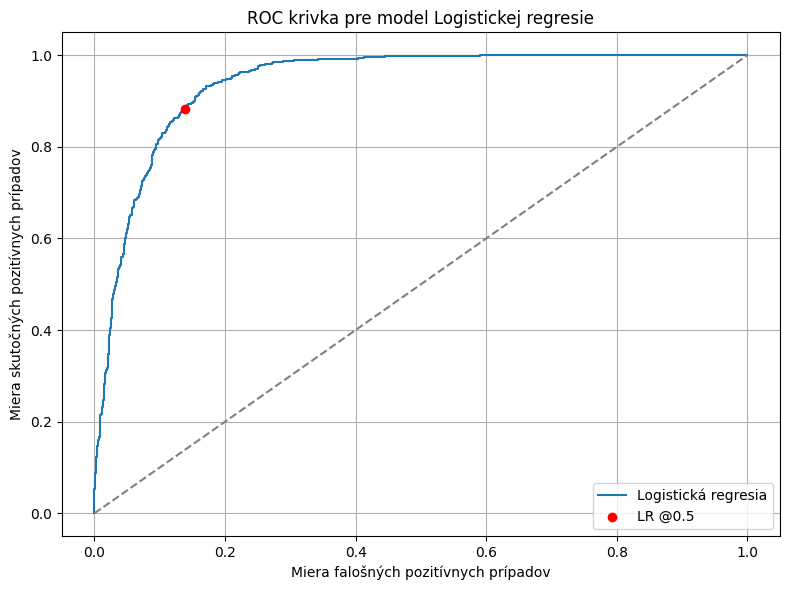

In [51]:
lr_probs = lr_os.predict_proba(X_test_os)[:, 1]

lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test_os, lr_probs)

def find_threshold_index(thresholds, target=0.5):
    return np.argmin(np.abs(thresholds - target))

idx_lr = find_threshold_index(lr_thresholds)

plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label="Logistická regresia")

plt.scatter(lr_fpr[idx_lr], lr_tpr[idx_lr], color='red', zorder=5, label="LR @0.5")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Miera falošných pozitívnych prípadov")
plt.ylabel("Miera skutočných pozitívnych prípadov")
plt.title("ROC krivka pre model Logistickej regresie")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Trénovanie modelu Naivného Bayesovho klasifikátora pred nadvzorkovaním

In [44]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb):.3f}")
nb_pred = nb.predict(X_test)
mcc_nb_pred = matthews_corrcoef(y_test, nb_pred)
print(f"MCC : {mcc_nb_pred:.3f}")

Accuracy: 0.877
Precision: 0.398
Recall: 0.552
F1 Score: 0.463
MCC : 0.402


Trénovanie modelu Naivného Bayesovho klasifikátora po nadvzorkovaním

In [45]:
nb_os = GaussianNB()
nb_os.fit(X_train_os, y_train_os)
y_pred_nb_os = nb_os.predict(X_test_os)

print(f"Accuracy: {accuracy_score(y_test_os, y_pred_nb_os):.3f}")
print(f"Precision: {precision_score(y_test_os, y_pred_nb_os):.3f}")
print(f"Recall: {recall_score(y_test_os, y_pred_nb_os):.3f}")
print(f"F1 Score: {f1_score(y_test_os, y_pred_nb_os):.3f}")
nb_po = nb_os.predict(X_test_os)
mcc_nb = matthews_corrcoef(y_test_os, nb_po)
print(f"MCC : {mcc_nb:.3f}")

Accuracy: 0.812
Precision: 0.842
Recall: 0.769
F1 Score: 0.804
MCC : 0.627


ROC krivka pre Naivný Bayesov klasifikátor

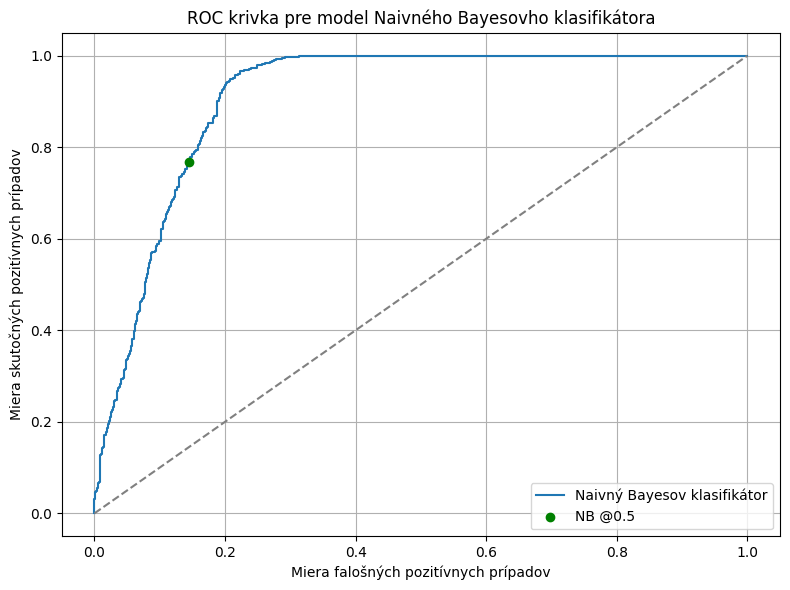

In [52]:
nb_probs = nb_os.predict_proba(X_test_os)[:, 1]

nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test_os, nb_probs)

def find_threshold_index(thresholds, target=0.5):
    return np.argmin(np.abs(thresholds - target))

idx_nb = find_threshold_index(nb_thresholds)

plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label="Naivný Bayesov klasifikátor")

plt.scatter(nb_fpr[idx_nb], nb_tpr[idx_nb], color='green', zorder=5, label="NB @0.5")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Miera falošných pozitívnych prípadov")
plt.ylabel("Miera skutočných pozitívnych prípadov")
plt.title("ROC krivka pre model Naivného Bayesovho klasifikátora")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ROC krivky modelov Náhodného lesa, Logistickej regresie a Naivného Bayesovho klasifikátora spoločne s hodnotou AUC

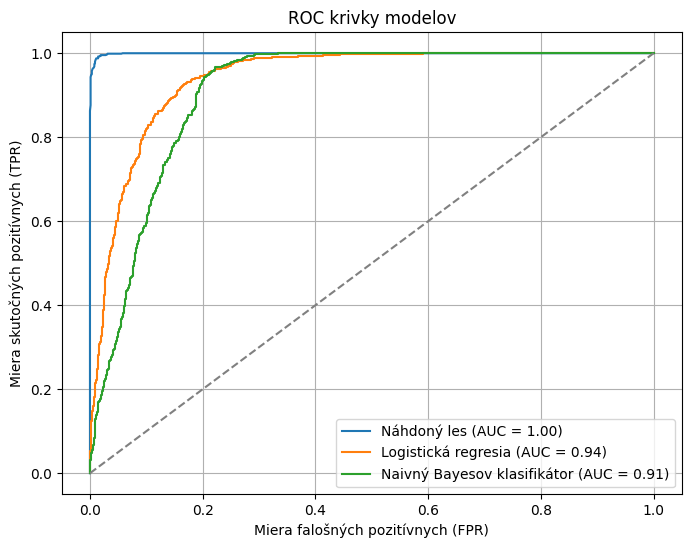

In [102]:
rf_probs = rf_os.predict_proba(X_test_os)[:, 1]
lr_probs = lr_os.predict_proba(X_test_os)[:, 1]
nb_probs = nb_os.predict_proba(X_test_os)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test_os, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_os, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test_os, nb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
lr_auc = auc(lr_fpr, lr_tpr)
nb_auc = auc(nb_fpr, nb_tpr)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Náhdoný les (AUC = {rf_auc:.2f})")
plt.plot(lr_fpr, lr_tpr, label=f"Logistická regresia (AUC = {lr_auc:.2f})")
plt.plot(nb_fpr, nb_tpr, label=f"Naivný Bayesov klasifikátor (AUC = {nb_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Miera falošných pozitívnych (FPR)")
plt.ylabel("Miera skutočných pozitívnych (TPR)")
plt.title("ROC krivky modelov")
plt.legend()
plt.grid(True)
plt.show()